## TWITTER SOCIAL NETWORK ANALYSIS

### Libraries and data cleaning

In [3]:
# libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
import plotly.express as px
import seaborn as sns
import networkx as nx
from pyvis.network import Network

In [5]:
data = pd.read_csv('Twitter-dataset/data/edges.csv', header = 0)
data

,1,11553
0,1,8762940
1,1,8762941
2,1,688136
3,1,8762942
4,3,718952
...,...,...
85331839,8762935,143150
85331840,8762936,8217613
85331841,8762937,8217613
85331842,8762938,8217613


In [6]:
# define table column names

new_col_names = {'1' : 'follower' , '11553' : 'target'}

In [7]:
data = data.rename(columns=new_col_names)

data.head(20)

,follower,target
0,1,8762940
1,1,8762941
2,1,688136
3,1,8762942
4,3,718952
5,3,3109655
6,3,562897
7,3,6
8,3,7
9,3,12852


In [8]:
# Load in nodes csv

data_nodes = pd.read_csv('Twitter-dataset/data/nodes.csv')
data_nodes

,1
0,2
1,3
2,4
3,5
4,6
...,...
11316805,11316807
11316806,11316808
11316807,11316809
11316808,11316810


In [9]:
new_col_names2 = {'1' : 'id'}

In [10]:
data_nodes = data_nodes.rename(columns=new_col_names2)

data_nodes.head(20)

,id
0,2
1,3
2,4
3,5
4,6
5,7
6,8
7,9
8,10
9,11


In [12]:
# save the csv files

## data.to_csv('edges_new.csv', index=False)

In [ ]:
##data_nodes.to_csv('nodes_new.csv', index=False)

In [ ]:
# sampling the data

sample_edges = data.sample(frac=0.00005)
sample_edges

,follower,target
64169747,1323220,1705124
5536033,1842517,116563
18208810,4386868,2169286
73839202,3237004,32405
9034884,2395907,2524870
...,...,...
5393150,68260,1761703
43807673,3402,4193091
82487845,6765177,6689755
77596380,4411798,3403


In [60]:
sample_edges2 = data.sample(frac=0.000001)
sample_edges2

,follower,target
71139,37042,8765321
73413161,3111503,3286197
58738336,627898,56003
47780808,1294063,450705
65527147,1500277,118242
...,...,...
77281194,4313626,94160
31947399,3887,1515713
39129252,256973,1628792
52280733,106699,638303


In [61]:
sample_edges2.to_csv('sample_edges2.csv', index=False)

### SNA networks

#### Directed networks (Unidirectional)

In [13]:
# Show connection

# Node Number 20

source =20

df_20 = data[data.follower == 20]
df_20

,follower,target
55,20,31
56,20,35
57,20,36
58,20,28
59,20,26
...,...,...
114,20,61851
115,20,2283433
116,20,8657299
117,20,1753610


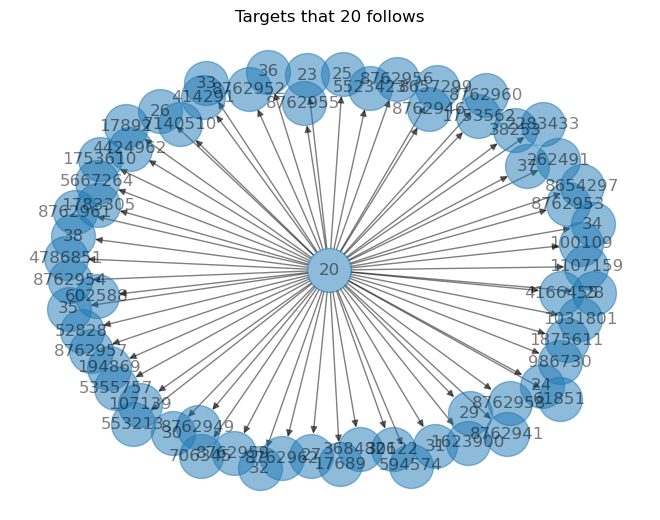

In [15]:
# create graph from edges
G = nx.from_pandas_edgelist(df_20, 'follower', 'target', create_using=nx.DiGraph())
# and plot
nx.draw(G, with_labels=True, node_size=1000, alpha=0.5, arrows=True)
plt.title('Targets that 20 follows')
plt.show()

In [22]:
# Sort followers by size

counts = data['follower'].value_counts()

counts = counts.sort_values(ascending=True)

In [24]:
filtered_counts = counts.loc[(counts > 3) & (counts < 10)]

print(filtered_counts.head(50))

1627131    4
1646370    4
2105220    4
2105239    4
2603239    4
1646320    4
1627165    4
2787303    4
4121768    4
3149255    4
4121783    4
3154029    4
1627098    4
4869911    4
4899409    4
2105211    4
4869917    4
4869927    4
4869946    4
4869949    4
2817711    4
3154028    4
2606386    4
1627099    4
1627105    4
1646378    4
2606392    4
3149183    4
2606809    4
3148379    4
4121775    4
3148384    4
2105009    4
3148347    4
4899826    4
4869631    4
2104988    4
1626597    4
4899834    4
2606727    4
4869988    4
2125117    4
3148315    4
3148210    4
3148197    4
4095348    4
4121772    4
1626602    4
4899841    4
3149235    4
Name: follower, dtype: int64


In [25]:
# another one

source =3149235

df_net = data[data.follower == source]
df_net

,follower,target
73547542,3149235,14772
73547543,3149235,3493
73547544,3149235,196816
73547545,3149235,256955


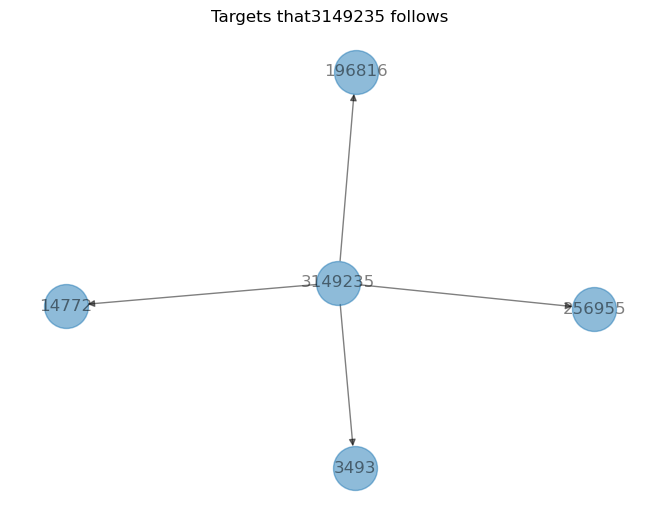

In [26]:
G = nx.from_pandas_edgelist(df_net, 'follower', 'target', create_using=nx.DiGraph())
# and plot
nx.draw(G, with_labels=True, node_size=1000, alpha=0.5, arrows=True)
plt.title('Targets that' + str(source) + ' follows')
plt.show()

In [29]:
### another example
filtered_counts = counts.loc[(counts > 9) & (counts < 12)]

print(filtered_counts.head(50))


10381713    10
3357624     10
260813      10
79661       10
3105041     10
3499635     10
6783370     10
1463211     10
421838      10
2384250     10
1931680     10
260807      10
421768      10
1848945     10
894986      10
1848940     10
2489595     10
3499979     10
991612      10
1464024     10
3029932     10
991493      10
2489470     10
2384724     10
3498831     10
2384722     10
421311      10
421291      10
3498826     10
421319      10
421323      10
2384715     10
991403      10
6782957     10
2384702     10
1463238     10
2384697     10
3357701     10
991426      10
2384685     10
1931411     10
171695      10
4391214     10
6783314     10
939601      10
6783226     10
3084789     10
6788205     10
5708546     10
3356164     10
Name: follower, dtype: int64


In [30]:
source =421838

df_net = data[data.follower == source]
df_net

,follower,target
56404617,421838,34194
56404618,421838,550093
56404619,421838,35925
56404620,421838,428804
56404621,421838,636467
56404622,421838,22115
56404623,421838,142428
56404624,421838,425867
56404625,421838,695578
56404626,421838,4343637


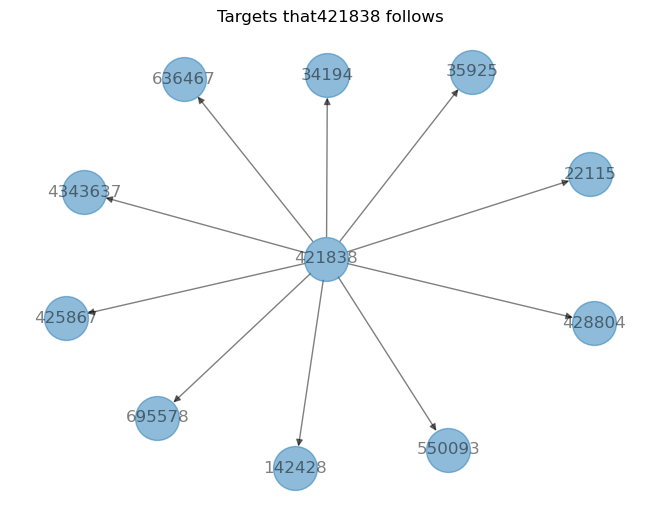

In [31]:
G = nx.from_pandas_edgelist(df_net, 'follower', 'target', create_using=nx.DiGraph())
# and plot
nx.draw(G, with_labels=True, node_size=1000, alpha=0.5, arrows=True)
plt.title('Targets that' + str(source) + ' follows')
plt.show()

In [34]:
### Targets that follow the source

target =3

df_net = data[data.target == target]
df_net



,follower,target
48155329,4,3
48156323,5,3
48158274,6,3
48159153,7,3
48159191,8,3
48159606,9,3
48160510,10,3
48160551,11,3
48161202,12,3
48161253,13,3


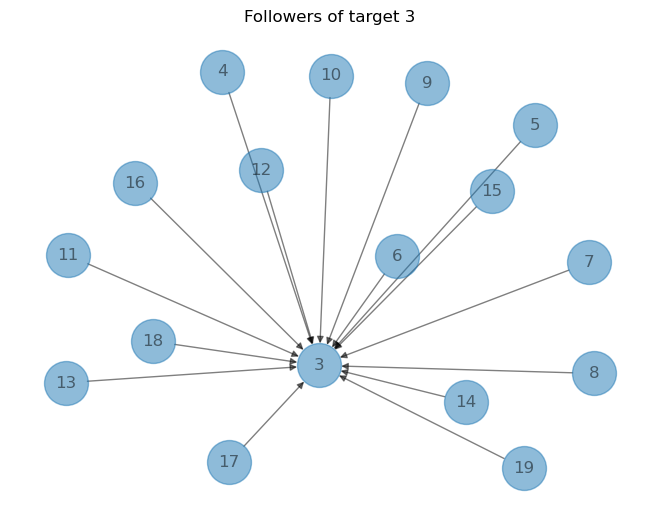

In [35]:
G = nx.from_pandas_edgelist(df_net, 'follower', 'target', create_using=nx.DiGraph())
# and plot
nx.draw(G, with_labels=True, node_size=1000, alpha=0.5, arrows=True)
plt.title('Followers of target ' + str(target))
plt.show()

In [38]:
# Another instance

target_counts = data['target'].value_counts()

target_counts = target_counts.sort_values(ascending=True)

In [39]:
target_counts

9154527         1
8004835         1
302168          1
302164          1
3322150         1
            ...  
3402       196882
3493       212494
1349110    341963
7496       350885
5994113    564512
Name: target, Length: 6626985, dtype: int64

In [41]:
filtered_counts = target_counts.loc[(target_counts > 3) & (target_counts < 5)]

print(filtered_counts)

1184716    4
2846148    4
6522858    4
9693177    4
2710014    4
          ..
422825     4
4499382    4
2087691    4
6833669    4
4146494    4
Name: target, Length: 259224, dtype: int64


In [42]:
target =4146494

df_net = data[data.target == target]
df_net

,follower,target
15413837,185624,4146494
15507305,3403506,4146494
22187482,1006496,4146494
22480086,793400,4146494


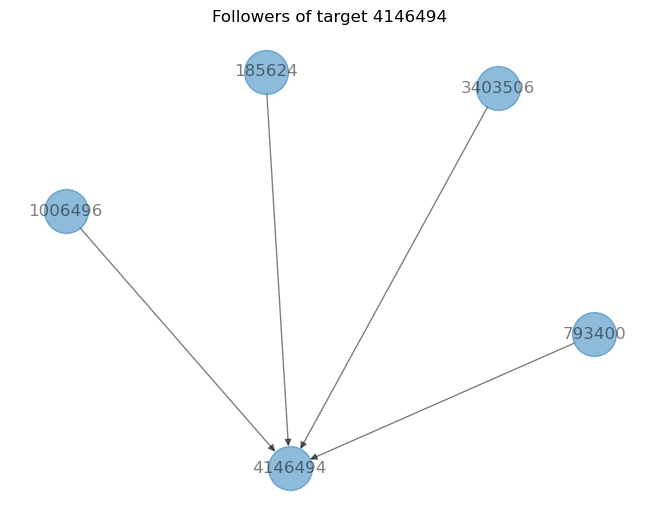

In [43]:
G = nx.from_pandas_edgelist(df_net, 'follower', 'target', create_using=nx.DiGraph())
# and plot
nx.draw(G, with_labels=True, node_size=1000, alpha=0.5, arrows=True)
plt.title('Followers of target ' + str(target))
plt.show()

#### Reciprocal edges (Bidirected nets)

In [45]:
user = 100
df_out = data[data.follower==user]
df_in = data[data.target==user]
df_select = pd.concat([df_in,df_out])
df_select

,follower,target
6769912,777202,100
21657537,126698,100
21930020,699,100
21963857,245669,100
23000792,8079,100
30902595,626186,100
48182360,100,41
48182361,100,22756
48182362,100,85690
48182363,100,777202


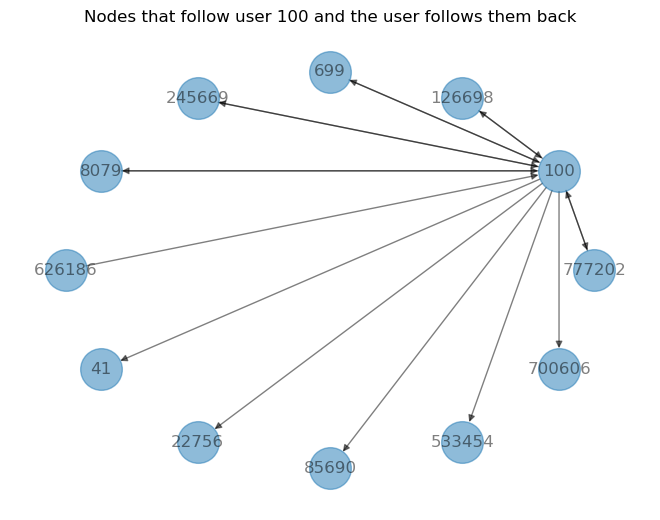

In [50]:
G = nx.from_pandas_edgelist(df_select, 'follower', 'target', create_using=nx.DiGraph())
# and plot
nx.draw_circular(G, with_labels=True, node_size=900, alpha=0.5, arrows=True)
plt.title('Nodes that follow user ' + str(user) + ' and the user follows them back')
plt.show()

In [51]:
# Nodes with most followers

target = 7496

df_net = data[data.target == target]
df_net

,follower,target
165,41,7496
7193,2506,7496
11985,3682,7496
19180,12476,7496
24264,13655,7496
...,...,...
75816990,3882761,7496
75816991,3882762,7496
75816992,3882763,7496
75816993,3882764,7496


KeyboardInterrupt: 

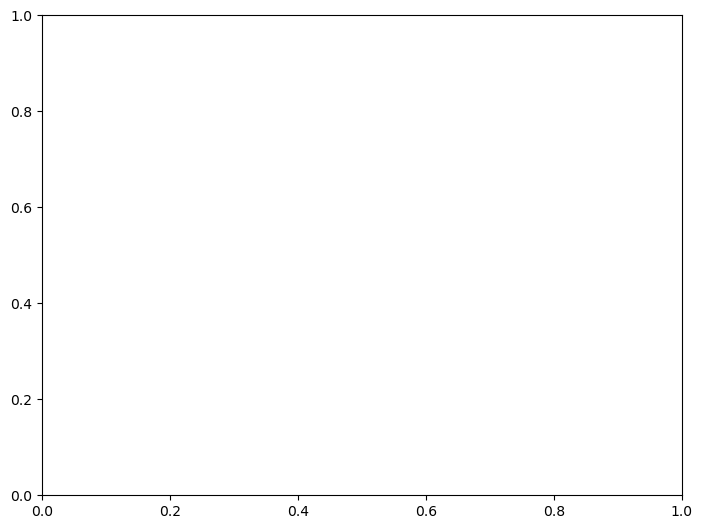

In [53]:
G = nx.from_pandas_edgelist(df_net, 'follower', 'target', create_using=nx.DiGraph())
# and plot
nx.draw(G, with_labels=True, node_size=1000, alpha=0.5, arrows=True)
plt.title('How an influencer ' + str(target) + ' network looks like')
plt.show()

In [ ]:
# another angle

net = Network(notebook=True, width='800px', height='500px')
net.directed = True
net.from_nx(G)
net.show('example.html')

In [54]:
### Users with few followers

filtered_counts = target_counts.loc[(target_counts > 1) & (target_counts < 3)]

print(filtered_counts)

8459503     2
10483568    2
10483524    2
5858872     2
10483502    2
           ..
1091612     2
2471614     2
2471699     2
9426985     2
1911201     2
Name: target, Length: 933122, dtype: int64


In [55]:
target = 8459503

df_net = data[data.target == target]
df_net

,follower,target
22589609,1000829,8459503
43825487,3402,8459503


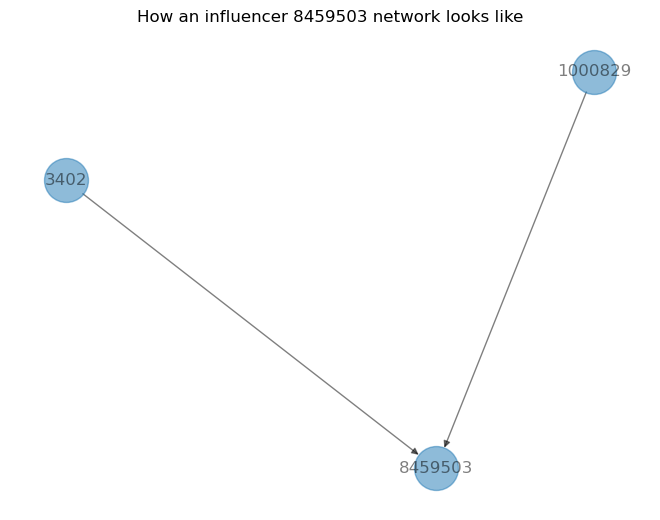

In [56]:
G = nx.from_pandas_edgelist(df_net, 'follower', 'target', create_using=nx.DiGraph())
# and plot
nx.draw(G, with_labels=True, node_size=1000, alpha=0.5, arrows=True)
plt.title('How an influencer ' + str(target) + ' network looks like')
plt.show()

## Sampling

In [62]:
## new df with first 200 rows

data_200 = data.head(200)
data_200

,follower,target
0,1,8762940
1,1,8762941
2,1,688136
3,1,8762942
4,3,718952
...,...,...
195,41,361
196,41,359
197,41,358
198,41,342


In [63]:
data_200.to_csv('sample_200.csv', index=False)